# In this script will be performed model analysis

The data used to analyze the model is the one tested in Data Analysis Script as follow:
1. Gyroscope X,Y and Z axis;
2. Motor Temperature;
3. RPM;
4. Audio samples (rms).

The model will predict class 0 or 1. 
- 0 = motor failure
- 1 = motor ok

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import collections
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import joblib

# Start preparing the data

In [2]:
# read csv file
data = pd.read_csv('Collected_Data/real_data_t3.csv',converters={'Audio':pd.eval}, index_col=[0])
data

,Gyro_x,Gyro_y,Gyro_z,Motor_Temperature,RPM,Label,Audio
0,-4.300503,-0.136660,1.636753,23.826098,NaN,1.000000,"[3.4293235307045786, 5.1074145042672425, 5.235..."
1,-0.541583,-8.597429,-2.116111,23.810000,NaN,1.000000,"[3.6600818356847724, 4.866245027025189, 5.0166..."
2,-6.939658,2.899673,7.787714,23.829048,NaN,1.000000,"[3.776598360958341, 5.211351139105633, 5.52837..."
3,-4.662305,2.874228,-0.358779,23.852857,NaN,1.000000,"[3.567332073312465, 5.28027796143357, 5.311601..."
4,-6.179736,-10.024636,-2.158223,23.845455,NaN,1.000000,"[3.5422192483491743, 5.0647968787372015, 5.386..."
...,...,...,...,...,...,...,...
1070,-4.153553,-3.212566,-1.866119,29.997692,51.376271,0.000000,"[111.8598250170796, 193.57377891708077, 236.19..."
1071,-6.410159,3.316794,2.969172,29.996154,NaN,0.000000,"[681.7336359301132, 1076.437566403486, 847.462..."
1072,-3.627933,3.093582,1.574498,29.981111,NaN,0.000000,"[152.93191166075167, 193.35979102322736, 235.0..."
1073,-4.379135,3.322872,4.301103,29.966296,52.896260,0.000000,"[366.6599693169153, 500.5359788044628, 576.366..."


In [3]:
indexes = data[((data['Label'] < 1) &  (data['Label'] > 0))].index
data.drop(indexes, axis = 0,inplace=True)
data = data.reset_index(drop=True)
data

,Gyro_x,Gyro_y,Gyro_z,Motor_Temperature,RPM,Label,Audio
0,-4.300503,-0.136660,1.636753,23.826098,NaN,1.0,"[3.4293235307045786, 5.1074145042672425, 5.235..."
1,-0.541583,-8.597429,-2.116111,23.810000,NaN,1.0,"[3.6600818356847724, 4.866245027025189, 5.0166..."
2,-6.939658,2.899673,7.787714,23.829048,NaN,1.0,"[3.776598360958341, 5.211351139105633, 5.52837..."
3,-4.662305,2.874228,-0.358779,23.852857,NaN,1.0,"[3.567332073312465, 5.28027796143357, 5.311601..."
4,-6.179736,-10.024636,-2.158223,23.845455,NaN,1.0,"[3.5422192483491743, 5.0647968787372015, 5.386..."
...,...,...,...,...,...,...,...
1062,-5.271873,4.968585,3.370816,29.990000,46.989984,0.0,"[273.2581441370358, 476.2511123489299, 417.802..."
1063,-4.153553,-3.212566,-1.866119,29.997692,51.376271,0.0,"[111.8598250170796, 193.57377891708077, 236.19..."
1064,-6.410159,3.316794,2.969172,29.996154,NaN,0.0,"[681.7336359301132, 1076.437566403486, 847.462..."
1065,-3.627933,3.093582,1.574498,29.981111,NaN,0.0,"[152.93191166075167, 193.35979102322736, 235.0..."


In [4]:
helper_df = data.drop(columns='Audio')

# send only the first 30 audio rms values
audio_data = pd.DataFrame(data['Audio'].tolist())
audio_data = audio_data.drop(audio_data.iloc[:, 41:],axis = 1)
audio_data
data_expanded = pd.concat((helper_df, audio_data), axis=1)
data_expanded

,Gyro_x,Gyro_y,Gyro_z,Motor_Temperature,RPM,Label,0,1,2,3,...,31,32,33,34,35,36,37,38,39,40
0,-4.300503,-0.136660,1.636753,23.826098,NaN,1.0,3.429324,5.107415,5.235251,5.192704,...,5.077460,5.030744,5.108474,4.970990,5.054511,4.951923,5.081204,5.227505,5.264299,5.023062
1,-0.541583,-8.597429,-2.116111,23.810000,NaN,1.0,3.660082,4.866245,5.016669,5.494748,...,5.407466,5.495312,5.587343,5.560535,5.530767,5.366857,5.383594,5.312642,5.301626,5.442058
2,-6.939658,2.899673,7.787714,23.829048,NaN,1.0,3.776598,5.211351,5.528373,5.375458,...,5.240650,5.383661,5.160993,4.716168,4.785440,5.017290,5.144494,5.190958,5.313519,4.640331
3,-4.662305,2.874228,-0.358779,23.852857,NaN,1.0,3.567332,5.280278,5.311601,5.176583,...,5.078913,4.920550,4.742668,5.091272,4.965420,5.238952,5.328094,5.276820,5.220360,5.335145
4,-6.179736,-10.024636,-2.158223,23.845455,NaN,1.0,3.542219,5.064797,5.386243,5.393013,...,5.417357,5.062340,5.276291,5.533305,5.450077,5.416798,5.284589,5.057127,5.179927,5.299371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,-5.271873,4.968585,3.370816,29.990000,46.989984,0.0,273.258144,476.251112,417.802021,393.833301,...,201.798865,258.996041,297.684314,292.791709,294.302977,301.193049,337.863566,272.143468,224.674681,197.897386
1063,-4.153553,-3.212566,-1.866119,29.997692,51.376271,0.0,111.859825,193.573779,236.196261,311.294717,...,338.557696,333.926932,304.208862,238.161467,211.418114,206.226238,223.891812,237.433319,243.110386,249.310962
1064,-6.410159,3.316794,2.969172,29.996154,NaN,0.0,681.733636,1076.437566,847.462919,560.719552,...,230.920727,245.946882,296.160787,321.249079,389.543150,437.130896,540.057845,475.387554,478.513528,412.434007
1065,-3.627933,3.093582,1.574498,29.981111,NaN,0.0,152.931912,193.359791,235.038502,243.387902,...,712.096605,564.942644,534.750864,374.231552,266.678085,215.981851,222.091054,241.954832,214.643861,263.816489


<AxesSubplot: >

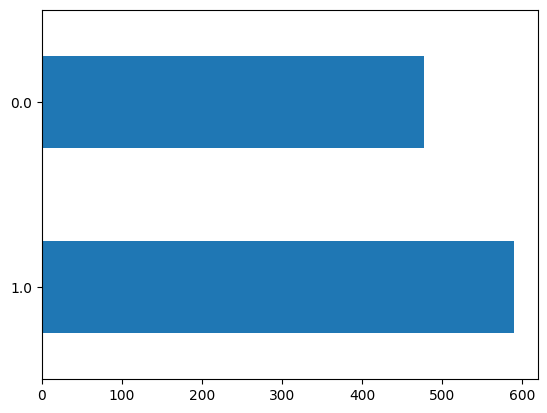

In [5]:
# look to the distribution of classes
data_expanded.Label.value_counts().plot(kind='barh')

In [6]:
# function to locate the rows which contain specific value in dataframe
def locate_rows(dataframe, column, value, operation='equality'):
    # grab the indexes where starts each csv
    if operation == 'equality':
        return dataframe[dataframe[column] == value].index.tolist()
    elif operation == 'differentiation':
        return dataframe[dataframe[column] != value].index.tolist()
    elif operation == 'non_value':
        return dataframe[dataframe[column].notna()].index.tolist()

In [7]:
def calculate_mean_per_index(dataframe, indexes):
    
    # declare dict to store mean per column
    column_mean = collections.defaultdict(list)
    
    # declare columns to perform average
    columns = list(dataframe.columns)
    del columns[4:7]
    
    first_iterator = False
    
    # with the non_consecutive index values let's grab the original csv row index and split them in lists
    for pos, index in enumerate(indexes):
        
        if pos + 1 != len(indexes):
            helper_df = dataframe.loc[indexes[pos-1] + 1:index]
            
        if not first_iterator:
            # create a helper dataframe only with the respective indexes to calculate mean
            helper_df = dataframe.loc[:index]
            first_iterator = True
            
        # calculate the mean per indexes
        for column in columns:
            column_mean[column].append(helper_df[column].mean())
            
        # add also rpm value to dict
        column_mean['RPM'].append(dataframe.RPM[index])
        column_mean['Audio'].append(dataframe.Audio[index])
        column_mean['Label'].append(dataframe.Label[index])
        
    return pd.DataFrame(column_mean)

In [8]:
# agregate data using mean to get only rows with rpm
start_indexes = locate_rows(data, 'RPM', 0, 'non_value')
mean_df = calculate_mean_per_index(data,start_indexes)
mean_df

helper_df1 = mean_df.drop(columns='Audio')

# send only the first 30 audio rms values
audio_data = pd.DataFrame(mean_df['Audio'].tolist())
audio_data = audio_data.drop(audio_data.iloc[:, 20:],axis = 1)

data_expanded = pd.concat((helper_df1, audio_data), axis=1)
data_expanded

,Gyro_x,Gyro_y,Gyro_z,Motor_Temperature,RPM,Label,0,1,2,3,...,10,11,12,13,14,15,16,17,18,19
0,-5.485644,-1.948604,1.075855,23.827849,72.142506,1.0,3.702293,4.809296,4.945011,5.081377,...,5.432532,5.201942,5.168296,5.250908,5.219243,5.416698,5.400142,5.501047,5.530206,5.495527
1,-3.173864,-1.171334,-0.436488,23.895024,73.784491,1.0,3.205599,4.486638,4.934837,4.990353,...,4.932646,4.910311,4.723724,5.066411,5.249892,5.017091,4.901775,4.810133,4.903864,4.809397
2,-7.671756,5.739417,0.059681,23.950909,67.886133,1.0,3.695751,4.953833,4.843908,4.738041,...,5.099542,5.031392,4.830281,4.850836,4.836357,4.887123,4.872884,4.608739,4.727910,4.826060
3,-5.227554,-16.042530,-2.214831,24.002381,73.300530,1.0,3.642297,4.965124,4.782183,4.702755,...,4.697623,4.824167,4.751978,4.854645,4.896242,4.930262,4.966977,4.871091,4.800216,4.839830
4,-6.439972,4.329372,1.172189,23.981364,75.528000,1.0,3.776369,4.877994,4.876197,5.201754,...,5.067791,4.824339,4.731992,5.027916,5.098334,4.963355,4.594514,4.902092,5.139950,4.965161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,-1.986146,-3.988691,-1.675148,30.000370,48.293257,0.0,276.423143,390.691252,333.561722,304.078874,...,221.290007,251.712098,280.342768,261.507636,239.264798,245.446323,251.446488,251.535455,264.081704,276.527163
567,-5.520878,1.893597,2.316874,29.957521,54.523089,0.0,129.354653,180.406720,213.592311,231.578483,...,225.291946,247.006730,251.533510,256.887987,262.080868,236.940326,180.036309,188.267433,200.466299,234.175389
568,-5.271873,4.968585,3.370816,29.990000,46.989984,0.0,273.258144,476.251112,417.802021,393.833301,...,261.821617,284.993318,263.812203,277.715767,322.386193,356.408133,427.406955,460.072622,475.345013,426.122628
569,-4.153553,-3.212566,-1.866119,29.997692,51.376271,0.0,111.859825,193.573779,236.196261,311.294717,...,641.428754,472.705712,395.742979,313.712870,287.659865,225.360184,216.537021,269.250946,264.395989,230.220406


In [9]:
# convert column name to str
data_expanded.columns = data_expanded.columns.astype(str)

# split data and labels
x_data = data_expanded.loc[:, data_expanded.columns != 'Label']
y_data = data_expanded['Label']

Looking to the variance the first 2 components already explain  72 % of the variation. so for this reason let's test with only these one and check the accuracy

# Test Models

In these test the models tested will be random forest and decision trees to enable the analysis of the features that have impact in each predicted label. Through this strategy will be possible to say the possible failure in motor.

1. Will be tested some models without normalize data
2. Will be tested some models with normalize data

In these tests the PCA will not be used since we don't want to remove features to enable motor failure prediction.

In [53]:
# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data,test_size=0.30, random_state=42,stratify=y_data)
print (X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(399, 25) (399,) (172, 25) (172,)


In [11]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, ExtraTreeClassifier, ExtraTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, ExtraTreesRegressor, ExtraTreesClassifier

# add models to use in list to perform train in all
models = [DecisionTreeClassifier(criterion='gini'), DecisionTreeRegressor(criterion='absolute_error'),
          RandomForestClassifier(), RandomForestRegressor(), ExtraTreeRegressor()
          ,ExtraTreeClassifier(), ExtraTreesRegressor(),ExtraTreesClassifier()]

for model in models:
    # train model with train set
    model.fit(X_train, y_train)
    print(f'{model} has {model.score(X_train, y_train)} on train set and {model.score(X_test,y_test)} on test set')    

DecisionTreeClassifier() has 1.0 on train set and 0.9709302325581395 on test set
DecisionTreeRegressor(criterion='absolute_error') has 1.0 on train set and 0.8361235878589901 on test set
RandomForestClassifier() has 1.0 on train set and 0.9941860465116279 on test set
RandomForestRegressor() has 0.9859611111111111 on train set and 0.9236850959575337 on test set
ExtraTreeRegressor() has 1.0 on train set and 0.8829454198992787 on test set
ExtraTreeClassifier() has 1.0 on train set and 0.8953488372093024 on test set
ExtraTreesRegressor() has 1.0 on train set and 0.9697975772424119 on test set
ExtraTreesClassifier() has 1.0 on train set and 0.9883720930232558 on test set


We already obtain almost maximized performance in all models, but let's test the same models in scaled data in range between -1 and 1 because we have negative values from gyroscope.

In [12]:
# normalize data to check if performance improves
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_data = scaler.fit_transform(x_data)

In [13]:
# split data into train and test
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(scaled_data, y_data,test_size=0.30, random_state=42,stratify=y_data)

In [14]:
for model in models:
    # train model with train set
    model.fit(X_train_scaled, y_train_scaled)
    print(f'{model} has {model.score(X_train_scaled, y_train_scaled)}' +
          f' on train set and {model.score(X_test_scaled,y_test_scaled)} on test set')    

DecisionTreeClassifier() has 1.0 on train set and 0.9767441860465116 on test set
DecisionTreeRegressor(criterion='absolute_error') has 1.0 on train set and 0.9297672519395672 on test set
RandomForestClassifier() has 1.0 on train set and 0.9941860465116279 on test set
RandomForestRegressor() has 0.9872006678809957 on train set and 0.9221446576834083 on test set
ExtraTreeRegressor() has 1.0 on train set and 0.6488362596978359 on test set
ExtraTreeClassifier() has 1.0 on train set and 0.9011627906976745 on test set
ExtraTreesRegressor() has 1.0 on train set and 0.9749292500340275 on test set
ExtraTreesClassifier() has 1.0 on train set and 0.9883720930232558 on test set


In DecisionTreeRegressor the results on test set are better when compared with non-normalized data, although in other models the performance didn't improve, for this reason and since we want to have performance in real-time we will ignore the normalize data step to save time.

# Observe the confusion matrix of best model

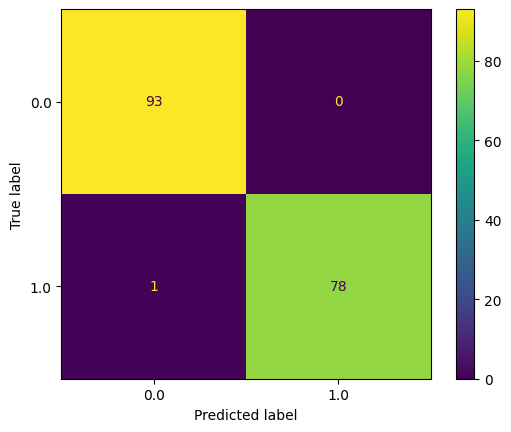


Classification Report 

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99        93
         1.0       1.00      0.99      0.99        79

    accuracy                           0.99       172
   macro avg       0.99      0.99      0.99       172
weighted avg       0.99      0.99      0.99       172



In [16]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report

# best model is random forest classifier insert in index 2 of models list
best_model = models[2]

# train model again
best_model.fit(X_train, y_train)

# plot confusion matrix 
predictions = best_model.predict(X_test)
cf_matrix = confusion_matrix(y_test, predictions)
ConfusionMatrixDisplay(confusion_matrix=cf_matrix, display_labels=best_model.classes_).plot()
plt.show()

# plot metrics classification report
print('\nClassification Report \n')
print(classification_report(y_test, predictions))

The model was very good and have a great performance now let's save it and use it in real time.

In [17]:
# save the best model trained
joblib.dump(best_model, "rf_model.joblib", compress=3)

['rf_model.joblib']

# To conclude this script is only missing the classification of the probable failure according to the features

To do that we need to analyze which features have more contribute to the predicted label, so let's test this technique on some samples. We will use treeinterpreter which is a library to that enable to find the contributions of each feature in tree models. For further info check https://coderzcolumn.com/tutorials/machine-learning/treeinterpreter-interpreting-tree-based-models-prediction-of-individual-sample

In [45]:
def obtain_probable_failure(contributions):
    features_non_audio = ['Gyro_x', 'Gyro_y', 'Gyro_z', 'Motor_Temperature', 'RPM']
    audio_features_value = 0
    gyro_features_value = 0
    features_values = dict()
    
    for c, feature in sorted(zip(contributions[0][:,1], x_data.columns), key=lambda x: -abs(x[0])):
        
        # sum audio features
        if feature not in features_non_audio:
            audio_features_value += abs(round(c, 3))
            features_values['Audio'] = audio_features_value
            
        # sum gyroscope feature
        elif feature in features_non_audio[:3]:
            gyro_features_value += abs(round(c, 3))
            features_values['Gyro'] = gyro_features_value
        else:
            features_values[feature] = abs(round(c, 3))
            
    print(f'Failure is {max(features_values, key=features_values.get)}')    
                
#     return probable failure

In [57]:
from treeinterpreter import treeinterpreter as ti
import random

for sample in X_test.index:
    prediction, _, contributions = ti.predict(best_model, np.array(list(X_test.loc[sample])).reshape(1, -1))
    print ("Instance", prediction)

    if prediction[0][0] > prediction[0][1]:
#         obtain_probable_failure(contributions)
        pass
    else:
        obtain_probable_failure(contributions)
#          for c, feature in sorted(zip(contributions[0][:,1], x_data.columns), key=lambda x: -abs(x[0])):
# #             print (feature, abs(round(c, 3)))
#             if feature not in features_non_audio:
#                 audio_features_value += abs(round(c, 3))
# #                 print(audio_features_value)

Instance [[0.89 0.11]]
Instance [[0.07 0.93]]
Failure is Motor_Temperature
Instance [[0.02 0.98]]
Failure is Motor_Temperature
Instance [[0.01 0.99]]
Failure is Motor_Temperature
Instance [[0.03 0.97]]
Failure is Motor_Temperature
Instance [[1. 0.]]
Instance [[0.05 0.95]]
Failure is Audio
Instance [[0.86 0.14]]
Instance [[0.96 0.04]]
Instance [[0.91 0.09]]
Instance [[0.09 0.91]]
Failure is Motor_Temperature
Instance [[0.93 0.07]]
Instance [[0. 1.]]
Failure is Audio
Instance [[0.13 0.87]]
Failure is Audio
Instance [[0.88 0.12]]
Instance [[0.93 0.07]]
Instance [[0.99 0.01]]
Instance [[0.96 0.04]]
Instance [[0.25 0.75]]
Failure is Audio
Instance [[0.97 0.03]]
Instance [[0.07 0.93]]
Failure is Motor_Temperature
Instance [[0. 1.]]
Failure is Motor_Temperature
Instance [[0.03 0.97]]
Failure is Motor_Temperature
Instance [[0.02 0.98]]
Failure is Motor_Temperature
Instance [[0.98 0.02]]
Instance [[0.97 0.03]]
Instance [[0.14 0.86]]
Failure is Motor_Temperature
Instance [[0.27 0.73]]
Failure is